In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [216]:
df1 = pd.read_csv(r"C:\Users\Anurag\Downloads\Species data.csv")

In [217]:
df1.columns = df1.columns.str.strip()

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (assuming it's in a CSV or DataFrame)
# df1 = pd.read_csv("your_file.csv")  

# Convert 'Date' column to datetime format (handling both possible formats)
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')  # Ensure correct parsing

df1['BC'] = df1['BC'] * 1000

# Extract the year
df1['Year'] = df1['Date'].dt.year

# Group by Year and compute the mean BC values per year (or use sum() if needed)
yearly_bc = df1.groupby('Year')['BC'].mean()  # Change to sum() if you need total BC per year

# # Plot the yearly bar chart
# plt.figure(figsize=(10, 5))
# yearly_bc.plot(kind='bar', color='none', edgecolor='black')

# # Labels and title
# plt.xlabel('Year')
# plt.ylabel('Average Black Carbon Concentration')
# plt.title('Yearly Average Black Carbon Concentration')
# plt.xticks(rotation=45)

# # Show the plot
# plt.show()


In [221]:
# Read data from CSV file
df = pd.read_csv(r"C:\Users\Anurag\Downloads\IGP_FIRECSV\IGP_CARE_filtered.csv")
df.columns = df.columns.str.strip()

In [222]:
df

,Date,CONFIDENCE,FRP,DAYNIGHT,Fire Count
0,19-01-2017,81,51.7,D,1
1,12-02-2017,81,51.4,D,1
2,02-03-2017,81,55.2,D,1
3,02-03-2017,83,64.5,D,1
4,13-03-2017,81,22.3,D,1
...,...,...,...,...,...
402,01-11-2020,81,23.1,D,1
403,19-12-2020,82,25.1,D,1
404,19-12-2020,81,22.0,D,1
405,21-12-2020,98,24.3,N,1


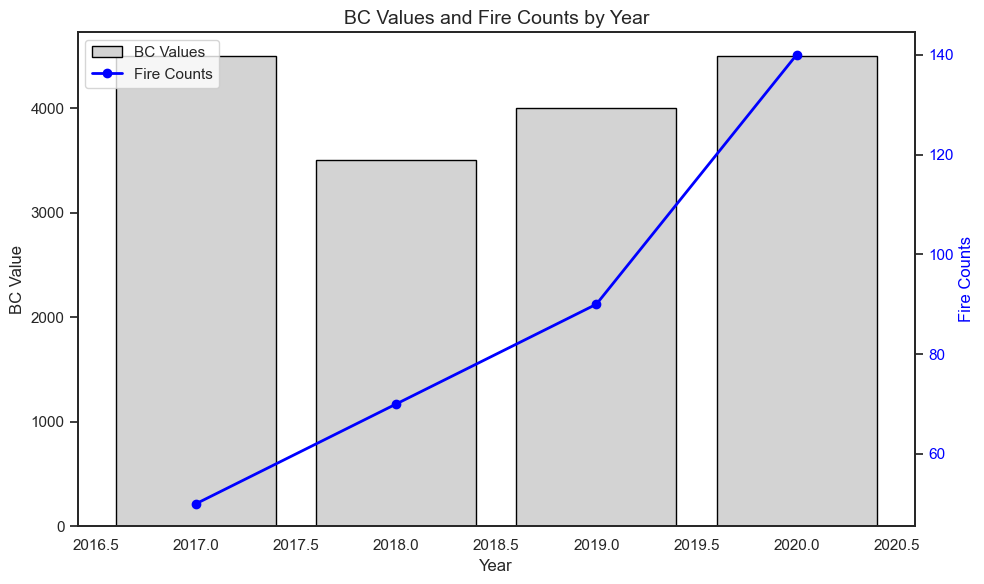

In [75]:
# Extract data for plotting
years = df['Year']
bc_values = df['BC']
fire_counts = df['Fire Counts']
FRP = df['FRP']


# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot BC values as bars on primary axis
bars = ax1.bar(years, bc_values, color='lightgray', edgecolor='black', label='BC Values')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('BC Value', fontsize=12)
ax1.tick_params(axis='y')

# Create secondary axis for Fire Counts
ax2 = ax1.twinx()
line = ax2.plot(years, fire_counts, color='blue', marker='o', linewidth=2, label='Fire Counts')
ax2.set_ylabel('Fire Counts', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Title
plt.title('BC Values and Fire Counts by Year', fontsize=14)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Add grid
ax1.grid(True, linestyle='--', alpha=0)

plt.tight_layout()
plt.show()


In [82]:
# Read data from CSV file
df = pd.read_csv(r"C:\Users\Anurag\Downloads\Fire.csv")
df.columns = df.columns.str.strip()

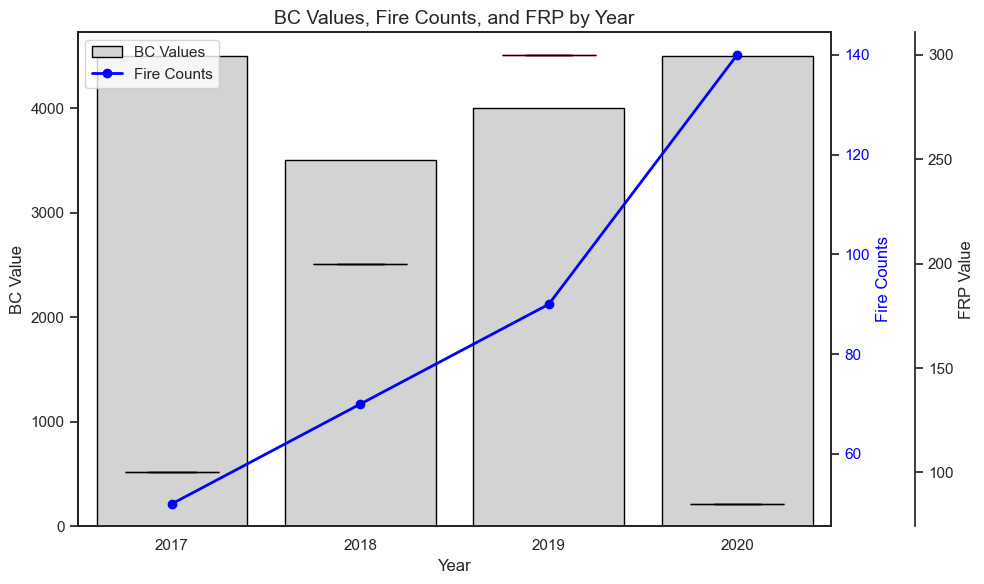

In [85]:

# Extract data for plotting
years = df['Year']
bc_values = df['BC']
fire_counts = df['Fire Counts']
FRP = df['FRP']

# Ensure that the FRP values are grouped by Year
df_grouped = df.groupby('Year')['FRP'].apply(list).reset_index()

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot BC values as bars on primary axis
bars = ax1.bar(years, bc_values, color='lightgray', edgecolor='black', label='BC Values')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('BC Value', fontsize=12)
ax1.tick_params(axis='y')

# Create secondary axis for Fire Counts
ax2 = ax1.twinx()
line = ax2.plot(years, fire_counts, color='blue', marker='o', linewidth=2, label='Fire Counts')
ax2.set_ylabel('Fire Counts', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Create third axis for FRP box plot
ax3 = ax1.twinx()  # Create a third axis on the right
ax3.spines['right'].set_position(('outward', 60))  # Move ax3 further to the right

# Add box plot for FRP data centered on each bar
positions = [bar.get_x() + bar.get_width() / 2 for bar in bars]

# Create the box plot
ax3.boxplot(df_grouped['FRP'], positions=positions, widths=0.5, patch_artist=True, 
            boxprops=dict(facecolor='orange', color='red'),
            medianprops=dict(color='black'))

ax3.set_ylabel('FRP Value', fontsize=12)  # Label for FRP axis
ax3.tick_params(axis='y')

ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Title
plt.title('BC Values, Fire Counts, and FRP by Year', fontsize=14)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Add grid
ax1.grid(True, linestyle='--', alpha=0)

plt.tight_layout()

plt.savefig('Fire.png', dpi=500)

plt.show()


C:\Users\Anurag\AppData\Local\Temp\ipykernel_21832\1494867275.py:33: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


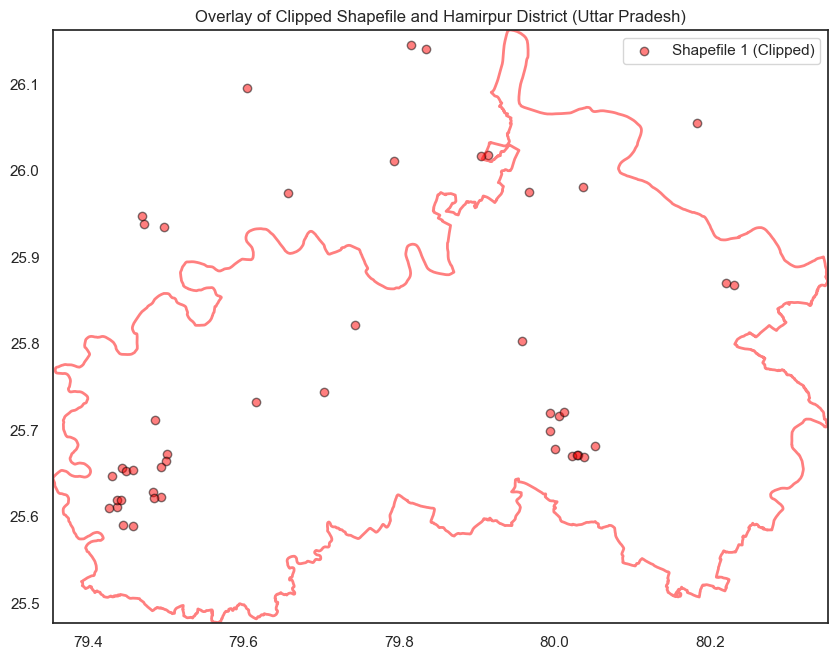

In [154]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your shapefiles
shapefile_1 = r"C:\Users\Anurag\Downloads\IGP\fire_archive_M-C61_574137.shp"
shapefile_2 = r"C:\Users\Anurag\Desktop\CEEW_work\India_District_Shapefile\India_Districts.shp"

# Read the shapefiles into GeoDataFrames
gdf1 = gpd.read_file(shapefile_1)
gdf2 = gpd.read_file(shapefile_2)

# Filter the GeoDataFrame for Hamirpur in Uttar Pradesh (both Dist_Name and State_Name should match)
gdf2_hamirpur_uttar_pradesh = gdf2[(gdf2['Dist_Name'] == 'Hamirpur') & (gdf2['State_Name'] == 'UTTAR PRADESH')]

# Clip the first shapefile (gdf1) using the geometry of the Hamirpur district (gdf2_hamirpur_uttar_pradesh)
gdf1_clipped = gpd.clip(gdf1, gdf2_hamirpur_uttar_pradesh)

# gdf1_clipped_filtered = gdf1_clipped[gdf1_clipped['CONFIDENCE'] >= 80]
### Not Clip
gdf1_80 = gdf1[gdf1['CONFIDENCE'] >= 80]

# Plot both shapefiles for Hamirpur district (Uttar Pradesh) on the same axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the clipped first shapefile in blue
# gdf1_clipped_filtered.plot(ax=ax, color='red', alpha=0.5, edgecolor='black', label='Shapefile 1 (Clipped)')
gdf1_80.plot(ax=ax, color='red', alpha=0.5, edgecolor='black', label='Shapefile 1 (Clipped)')

# Plot the second shapefile (Hamirpur district, Uttar Pradesh) in red
gdf2_hamirpur_uttar_pradesh.plot(ax=ax, color='none', edgecolor='red', alpha=0.5, linewidth=2, label='Hamirpur District (Uttar Pradesh)')

# Add legend and title
plt.legend()
plt.title('Overlay of Clipped Shapefile and Hamirpur District (Uttar Pradesh)')

# Adjust plot limits to zoom into the Hamirpur region (Uttar Pradesh)
minx, miny, maxx, maxy = gdf2_hamirpur_uttar_pradesh.total_bounds  # Get the bounds of the Hamirpur district
ax.set_xlim([minx, maxx])  # Set the x-axis limits
ax.set_ylim([miny, maxy])  # Set the y-axis limits

# Show the plot
plt.show()


In [210]:
import geopandas as gpd
import folium
from folium import plugins

# Path to your shapefiles
shapefile_1 = r"C:\Users\Anurag\Downloads\IGP\fire_archive_M-C61_574137.shp"
shapefile_2 = r"C:\Users\Anurag\Desktop\CEEW_work\India_District_Shapefile\India_Districts.shp"

# Read the shapefiles into GeoDataFrames
gdf1 = gpd.read_file(shapefile_1)
gdf2 = gpd.read_file(shapefile_2)

# Filter the GeoDataFrame for Hamirpur in Uttar Pradesh (both Dist_Name and State_Name should match)
gdf2_hamirpur_uttar_pradesh = gdf2[(gdf2['Dist_Name'] == 'Hamirpur') & (gdf2['State_Name'] == 'UTTAR PRADESH')]

# Clip the first shapefile (gdf1) using the geometry of the Hamirpur district (gdf2_hamirpur_uttar_pradesh)
gdf1_clipped = gpd.clip(gdf1, gdf2_hamirpur_uttar_pradesh)

# Filter the clipped GeoDataFrame based on CONFIDENCE >= 80
# gdf1_clipped_filtered = gdf1_clipped[gdf1_clipped['CONFIDENCE'] >= 80]
gdf1_80 = gdf1[gdf1['CONFIDENCE'] >= 80]

# Convert datetime columns to string if they exist in the GeoDataFrame
for col in gdf1_80.select_dtypes(include='datetime').columns:
    gdf1_80[col] = gdf1_80[col].astype(str)

for col in gdf2_hamirpur_uttar_pradesh.select_dtypes(include='datetime').columns:
    gdf2_hamirpur_uttar_pradesh[col] = gdf2_hamirpur_uttar_pradesh[col].astype(str)

# Get the centroid of the Hamirpur district to center the map
centroid = gdf2_hamirpur_uttar_pradesh.geometry.centroid.iloc[0]
latitude = centroid.y
longitude = centroid.x

# Create a folium map centered around Hamirpur district
m = folium.Map(location=[latitude, longitude], zoom_start=12)

folium.TileLayer('Esri.WorldImagery').add_to(m)

# Add the Hamirpur district (Uttar Pradesh) as a GeoJson layer
folium.GeoJson(gdf2_hamirpur_uttar_pradesh).add_to(m)


###
## Fire Marker or Icone
for idx, row in gdf1_80.iterrows():
    fire_location = [row.geometry.y, row.geometry.x]

    folium.Marker(
        location=fire_location,
        icon=folium.Icon(color="red", icon="fire", prefix="fa"),  # Fire icon from FontAwesome
        popup=f"Confidence: {row['CONFIDENCE']}%"
    ).add_to(m)


# Add the filtered clipped shapefile (gdf1_80) as a GeoJson layer
# folium.GeoJson(gdf1_80).add_to(m)

# Add a layer control to toggle between different layers (shapefiles)
folium.LayerControl().add_to(m)

# Display the map
m


C:\Users\Anurag\miniconda3\envs\CEEW\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Anurag\AppData\Local\Temp\ipykernel_21832\238546718.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf2_hamirpur_uttar_pradesh.geometry.centroid.iloc[0]


In [159]:
m.save('hamirpur_interactive_map.html')

print("Map saved as 'hamirpur_interactive_map.html'")

Map saved as 'hamirpur_interactive_map.html'


In [156]:
df = gdf1_80[['FRP', 'ACQ_DATE', 'CONFIDENCE', 'DAYNIGHT']]

df = pd.DataFrame(df)

df.to_csv('filtered_data.csv', index=False)

In [157]:
df 

,FRP,ACQ_DATE,CONFIDENCE,DAYNIGHT
26,51.7,2017-01-19,81,D
88,51.4,2017-02-12,81,D
121,55.2,2017-03-02,81,D
122,64.5,2017-03-02,83,D
138,22.3,2017-03-13,81,D
...,...,...,...,...
2891,23.1,2020-11-01,81,D
3119,25.1,2020-12-19,82,D
3120,22.0,2020-12-19,81,D
3136,24.3,2020-12-21,98,N
